In [624]:
from keras import layers
from keras import models
from keras.initializers import GlorotNormal
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential

In [625]:
# The data, split between train and test sets:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_labels = train_labels % 2
test_labels = test_labels % 2

train_l = ['Odd' if x == 1 else "Even" for x in train_labels]

train_images_subs= train_images[0:55000]
train_labels_subs = train_labels[0:55000]

test_images_subs = test_images[5000:]
test_label_subs = test_labels[5000:]

validation_images_a = train_images[55000:]
validation_images_a_label = train_labels[55000:]
validation_images_b = test_images[:5000]
validation_images_b_label = test_labels[:5000]

train_val = np.vstack((validation_images_a,validation_images_b))
train_lab_val = np.append(validation_images_a_label, validation_images_b_label)
print(train_labels_subs.shape,test_label_subs.shape,train_lab_val.shape)




(55000,) (5000,) (10000,)


In [626]:
train_labels_subs = to_categorical(train_labels_subs)
test_label_subs = to_categorical(test_label_subs)
train_lab_val = to_categorical(train_lab_val)
print(train_labels_subs.shape)
print(test_label_subs.shape)
print(train_lab_val.shape)

(55000, 2)
(5000, 2)
(10000, 2)


In [627]:
train_images_subs = train_images_subs.reshape((55000 , 28, 28, 1))
train_images_subs = train_images_subs.astype( 'float32' ) / 255

test_images_subs = test_images_subs.reshape((5000 , 28, 28, 1))
test_label_subs = test_label_subs.astype( 'float32' ) / 255

train_val = train_val.reshape((10000 , 28, 28, 1))
train_val = train_val.astype( 'float32' ) / 255

In [628]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.6))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)             

In [629]:
# Compile network
opt = Adam(lr = 0.001)
model.compile( optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [630]:
# Training the model

history = model.fit(train_images_subs, train_labels_subs, epochs = 10, batch_size= 128, validation_data=(train_val, train_lab_val))

Epoch 1/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1487 - accuracy: 0.9401 - val_loss: 0.0476 - val_accuracy: 0.9831
Epoch 2/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0583 - accuracy: 0.9796 - val_loss: 0.0316 - val_accuracy: 0.9905
Epoch 3/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0418 - accuracy: 0.9848 - val_loss: 0.0245 - val_accuracy: 0.9919
Epoch 4/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0364 - accuracy: 0.9877 - val_loss: 0.0223 - val_accuracy: 0.9923
Epoch 5/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0300 - accuracy: 0.9894 - val_loss: 0.0198 - val_accuracy: 0.9938
Epoch 6/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0272 - accuracy: 0.9905 - val_loss: 0.0204 - val_accuracy: 0.9932
Epoch 7/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0244 - accuracy: 0.9914 - val_loss: 0.0231 - val_accuracy: 0.9923
Epoch 

In [631]:
# Plot accuracy and loss
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [632]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

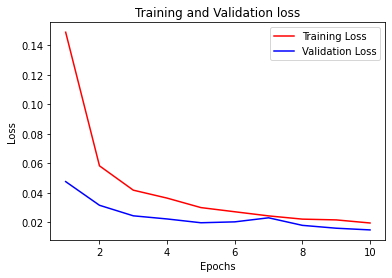

In [633]:
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

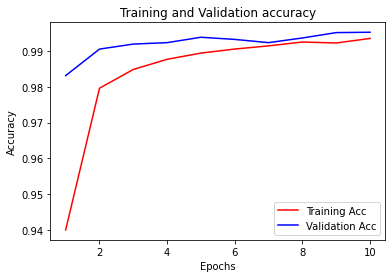

In [634]:
plt.plot(epochs, acc, 'r', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [635]:
print("Accuracy at the last epoch:")
print("Training Accuracy:", acc[-1])
print("Validation Accuracy:", val_acc[-1])

Accuracy at the last epoch:
Training Accuracy: 0.9934727549552917
Validation Accuracy: 0.995199978351593


In [636]:
print("Loss at the last epoch:")
print("Training Loss:", loss[-1])
print("Validation Loss:", val_loss[-1])

Loss at the last epoch:
Training Loss: 0.019603243097662926
Validation Loss: 0.014913982711732388


In [637]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.6))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
model.summary()


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)             

In [638]:
# Compile network
opt = Adam(lr= 0.001)
model.compile( optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [639]:
# Training the model

history = model.fit(train_images_subs, train_labels_subs, epochs = 10, batch_size= 128)
results = model.evaluate(test_images_subs,test_label_subs)
print(results)

Epoch 1/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1472 - accuracy: 0.9425
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.0597 - accuracy: 0.9788
Epoch 3/10
430/430 [==============================] - 2s 4ms/step - loss: 0.0427 - accuracy: 0.9847
Epoch 4/10
430/430 [==============================] - 2s 4ms/step - loss: 0.0367 - accuracy: 0.9867
Epoch 5/10
430/430 [==============================] - 2s 4ms/step - loss: 0.0311 - accuracy: 0.9893
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.0255 - accuracy: 0.9909
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9915
Epoch 8/10
430/430 [==============================] - 2s 4ms/step - loss: 0.0226 - accuracy: 0.9921
Epoch 9/10
430/430 [==============================] - 2s 4ms/step - loss: 0.0198 - accuracy: 0.9931
Epoch 10/10
157/157 [==============================] - 0s 2ms/step - loss: 7.5864 - accuracy: 0.9264

In [640]:
print(results)
model.save("cv_model.h5")

[7.586407661437988, 0.9264000058174133]


In [598]:
import cv2
from keras.models import load_model
new_model = load_model("cv_model.h5")
img = cv2.imread('imageof3.jpeg', cv2.IMREAD_UNCHANGED)
print('Original Dimensions : ',img.shape)

Original Dimensions :  (1168, 812, 3)


In [599]:
resized_img = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized_img.shape)

Resized Dimensions :  (28, 28, 3)


In [600]:
grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(grayscale_img, (3,3), 0)
req_img = cv2.adaptiveThreshold(blur_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)


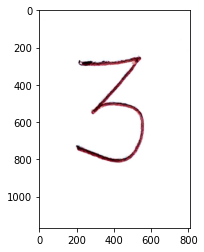

In [606]:
plt.imshow(img)

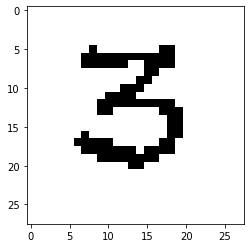

In [602]:
plt.imshow(req_img, cmap=plt.get_cmap('gray'))

In [603]:
req_img = req_img.astype( 'float32' ) / 255
req_img = req_img.reshape((1, 28, 28,1))

In [604]:
result = new_model.predict(req_img)
print(result)
if result[0,0] > result[0,1]:
  print("The number is Even")
else:
  print("The number is Odd")

[[0.06081068 0.9391893 ]]
The number is Odd
